In [28]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from sklearn.datasets import load_boston
boston = load_boston()

c:\Users\Dipti\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

In [30]:
data = pd.DataFrame(boston.data)

In [31]:
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [32]:
data['PRICE'] = boston.target
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [33]:
print(data.columns)
data.describe()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

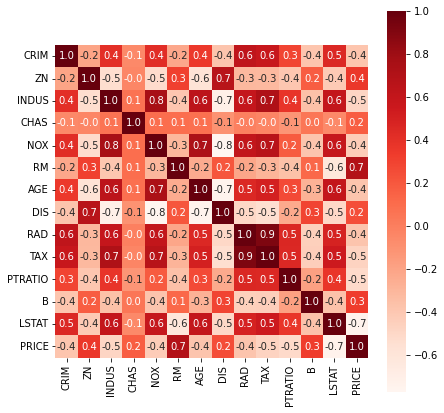

In [34]:
#plotting correlation matrics
corr = data.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size' : 10}, cmap = 'Reds')

In [35]:
X = data.drop(['PRICE'], axis=1)
y = data['PRICE']
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [37]:
import tensorflow as tf

In [38]:
observations = 1000
xs=np.random.uniform(-10,10,(observations,1))
zs=np.random.uniform(-10,10,(observations,1))
generated_inputs=np.column_stack((xs,zs))
noise=np.random.uniform(-10,10,(observations,1))
generated_target=2*xs-3*zs+5+noise
     

np.savez('TF_intro',input=generated_inputs,targets=generated_target)
training_data=np.load('TF_intro.npz')
     

input_size=2
output_size=1
models = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size)
                            ])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
models.fit(training_data['input'],training_data['targets'],epochs=100,verbose=1)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 70.5734
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 44.9530
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 41.3700
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 40.7088
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 38.5170
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 42.5950
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 43.5077
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 41.2668
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 37.0970
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 39.2258
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 38.0273
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 40.1166
Epoch 13/100
32/32 [=====

In [39]:
models.layers[0].get_weights()

[array([[ 0.96689665],
        [-3.1199205 ]], dtype=float32),
 array([5.0569286], dtype=float32)]

In [41]:
weights = models.layers[0].get_weights()[0]
bias = models.layers[0].get_weights()[1]

In [42]:
out = training_data['targets'].round(1)

from sklearn.metrics import mean_squared_error
mean_squared_error(generated_target, out, squared=False)

0.029374801491635037

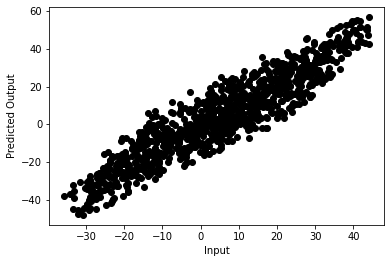

In [43]:
plt.scatter(np.squeeze(models.predict_on_batch(training_data['input'])),np.squeeze(training_data['targets']),c='#000000')
plt.xlabel('Input')
plt.ylabel('Predicted Output')
plt.show()